In [2]:
import numpy as np
from matplotlib import pyplot as plt

Plot the zeta value for late case B MT and beyond, i.e. stars that are beyond the HG type in COMAPS

This is eq. 27 from the [COMPAS method paper](https://arxiv.org/abs/2109.10352) (which comes from Sobermann 97)

In [3]:
def zeta_sph(m_sph):
    term1 = (2/3) * (m_sph / (1 - m_sph))
    term2 = -(1/3) * ((1 - m_sph) / (1 + 2 * m_sph))
    term3 = -0.03 * m_sph
    term4 = 0.2 * (m_sph / (1 + (1 - m_sph)**(-6)))
    
    zeta_sph_value = term1 + term2 + term3 + term4
    return zeta_sph_value


/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_89488/717185525.py:2: RuntimeWarning: divide by zero encountered in divide
  term1 = (2/3) * (m_sph / (1 - m_sph))
/var/folders/mc/hhcvbs7n2jq7d_hr2d6qvjhm0000gq/T/ipykernel_89488/717185525.py:5: RuntimeWarning: divide by zero encountered in power
  term4 = 0.2 * (m_sph / (1 + (1 - m_sph)**(-6)))


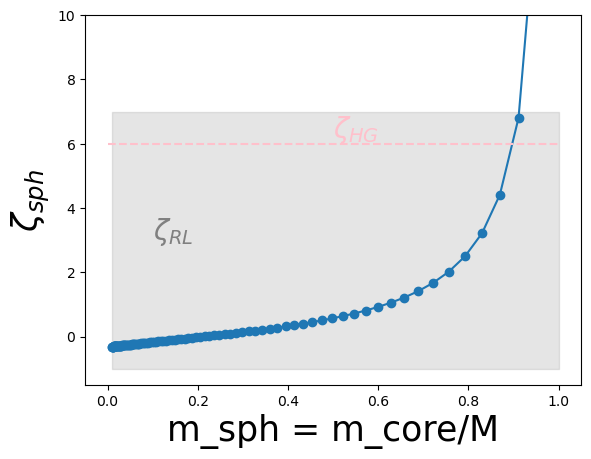

In [24]:
xes = np.logspace(-2, 0, 100)
plt.plot(xes, zeta_sph(xes), marker = 'o')
plt.xlabel("m_sph = m_core/M", size = 25)
plt.ylabel("$\zeta_{sph}$", size = 25)
plt.text(0.1, 3, "$\zeta_{RL}$", size = 20, c= 'grey')

plt.hlines(6, 0, 1, color = 'pink', linestyle = '--')
plt.text(0.5, 6.2, "$\zeta_{HG}$", size = 20, c= 'pink')

plt.fill_between(xes, y1 = -1, y2 = 7, alpha = 0.2, color = 'grey')
plt.ylim(-1.5,10)
plt.show()

Remember Mass transfer is stable when $\zeta_{RL} < \zeta_{eff} = \zeta_{sph}$ 

$\zeta_{RL}$ ranges beteen about -1 and 7 (see [Fig 6 from van Son et al](https://ui.adsabs.harvard.edu/abs/2022ApJ...940..184V/abstract)).